In [121]:
%pip install ipympl
%matplotlib widget


Note: you may need to restart the kernel to use updated packages.


In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE
from ast import literal_eval

df = pd.read_csv("./cds-stellantis-symptoms-lookup-table_export.csv")
df = df[["symptoms", "symp_embeddings"]]
df['cat'] = 0 
df['cat'] = np.where(df['symptoms'].isin(["cel on", "check engine light on", "engine light on"]), 1, 0)
matrix = np.array(df['symp_embeddings'].apply(literal_eval).to_list())

df_cat0 = df[df['cat'] == 0].sample(500)
df_cat1 = df[df['cat'] == 1]
df = df_cat0.append(df_cat1)


/var/folders/qh/tm79qg_s6_n_ywvr9by4s4jh0000gn/T/ipykernel_18738/2562833897.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_cat0.append(df_cat1)


In [123]:
df

,symptoms,symp_embeddings,cat
242,exhaust system failure,"[-0.029771157, 0.016308365, -0.016737886, -0.0...",0
150,vehicle has no power,"[-0.017056962, -0.0093049845, 0.0026818712, 0....",0
434,low voltage codes,"[-0.011844027, 0.007990468, -0.0049905004, -0....",0
471,service throttle warning light,"[-0.011098707, -0.013894404, -0.011911491, -0....",0
790,low line pressure,"[-0.013501311, 0.0017598539, 0.017325625, -0.0...",0
...,...,...,...
349,Internal Coolant Leak,"[-0.006812394, 0.018184533, 0.012324921, -0.03...",0
729,diesel engine maintenance,"[-0.009011818, 3.0731925E-4, 0.0021458357, -0....",0
41,check engine light on,"[-0.019812554, -0.008862461, 0.012000557, -0.0...",1
58,engine light on,"[-0.006408318, -0.00855313, 0.014625199, -0.03...",1


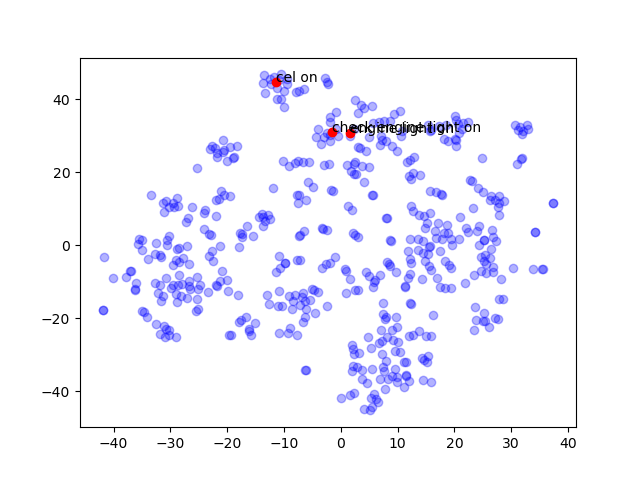

In [124]:
# For 2D


matrix = np.array(df['symp_embeddings'].apply(literal_eval).to_list())
# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate='auto')
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape
colors = ["red", "blue"]
x = [x for x, y in vis_dims]
y = [y for x, y in vis_dims]
cat = df['cat'].tolist()
symp = df['symptoms'].tolist()



fig = plt.figure()
ax = fig.add_subplot()
for i in range(0, len(x)):
    if cat[i] == 1:
        ax.text(x[i], y[i], symp[i])
        plt.scatter(x[i], y[i], color = 'red')
    else:
        plt.scatter(x[i], y[i], alpha = 0.3, color = "blue")
plt.show()



In [125]:
# len(z)


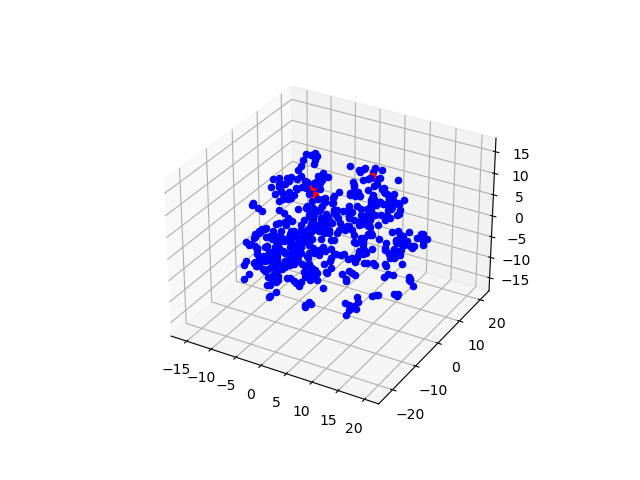

In [126]:
# For 3D
# Create a t-SNE model and transform the data
plt.close('all')

tsne = TSNE(n_components=3, perplexity=15, random_state=42, init='random', learning_rate="auto")
vis_dims = tsne.fit_transform(matrix)
x = [x for x, y, z in vis_dims]
y = [y for x, y, z in vis_dims]
z = [z for x, y, z in vis_dims]

cat = df['cat'].tolist()
symp = df['symptoms'].tolist()

# for i in zip(x,y,z, cat, symp):
#     print(i)
# n = -3
# x = x[n::]
# y = y[n::]
# z = z[n::]

# cat = cat[n::]
# symp = symp[n::]



fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for x,y,z, cat, symp in zip(x,y,z, cat, symp):
    if cat==1:
        #ax.text(x,y,z,symp)
        ax.scatter(x,y,z,c = "red")
    else:
        ax.scatter(x,y,z, c = "blue")

# # for zdir, x, y, z in zip(zdirs, x, y, z):
# #     label = '(%d, %d, %d), dir=%s' % (x, y, z, zdir)
# #     ax.text(x, y, z, label, zdir)

# for x,y,z,cat,symp in zip(x,y,z,cat,symp):
#     if cat == 1:
#         ax.text(x,y,z, symp)
# #         plt.scatter(x[i], y[i], z[i], color = 'red')
# #     else:
# #         plt.scatter(x[i], y[i], z[i], alpha = 0.05, color = "blue")

# # for x, y, z in zip(xs, ys, zs):
# plt.scatter(x, y, z)


plt.show()
